# Music recommender system

Recommendation systems are one of the most widely used machine learning algorithms. 
A  recommendation system is a filtering system whose goal is to forecast a user's rating or preference for an object, such as a film or a song.

Content-based filters and collaborative filters are the two most common forms of recommender systems.b

* Collaborative-based filters: forecast what a user would enjoy based on what other users who are similar to that user have liked.
 
* Content-based filters: estimate what a user would enjoy based on what they have enjoyed previously.  

## Content-based Filtering

Content-based Filtering is a Machine Learning technique that uses similarities in features to make decisions. This technique is often used in recommender systems, which are algorithms designed to advertise or recommend things to users based on knowledge accumulated about the user.

The idea is to extract relevant  keywords from a user's favorite song description, search for those keywords in other song descriptions to estimate similarities, and then recommend those songs to the user based on that.

Extract meaningful keywords in this case is done via **TF-IDF** because we're dealing with text and words.

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Data

Dataset is scraped from LyricsFreak

In [4]:
songs = pd.read_csv('songdata.csv')

Text Preprocessing: removing newlines

In [5]:
songs = songs.sample(n=5000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '')

The TF-IDF vectorizer is used to generate the TF-IDF score for each song lyric, word by word and put results in a recommendation matrix

### TF-IDF

In [6]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(songs['text'])

### Calculating  similarities between lyrics

**Cosine similarity** : It checks if two vectors are pointing in nearly the same direction by measuring the cosine of the angle between them. It's frequently used in text analysis to assess document similarity.

One of the reasons for the popularity of cosine similarity is that it is very efficient to evaluate, especially for sparse vectors.

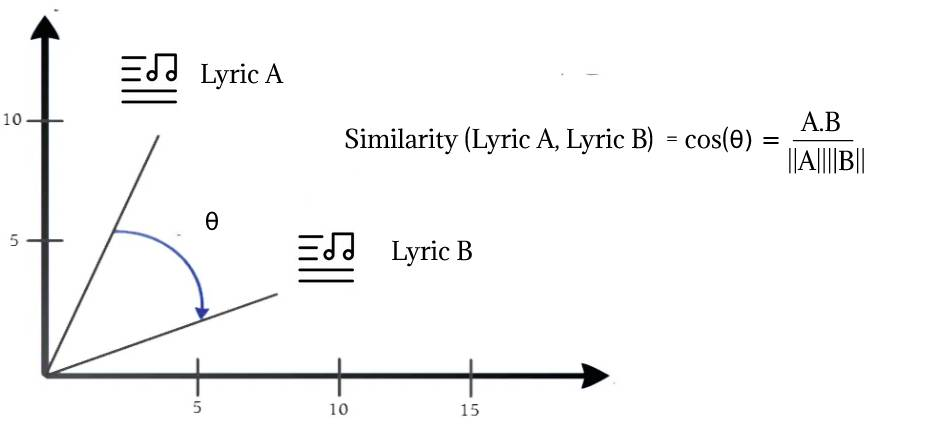

In [7]:
cosine_similarities = cosine_similarity(lyrics_matrix)

In [8]:
similarities = {}

    1.  We sort each element in cosine_similarities and we get the indexes of the songs. 
    2.  We store in similarities each name of the 50 most similar songs

In [9]:
for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    similarities[songs['song'].iloc[i]] = [(cosine_similarities[i][x], songs['song'][x], 
                                            songs['artist'][x]) for x in similar_indices][1:]

We use that similarity scores to access the most similar songs to recommend them.

In [12]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
        
    def recommend(self, recommendation):
        song = recommendation['song'] # song we want to give similar recommendations for
        number_songs = recommendation['number_songs'] # number of recommendations we will propose
        recom_song = self.matrix_similar[song][:number_songs] # access most similar songs from matrix similarities
        self._print_message(song=song, recom_song=recom_song)

In [13]:
recommedations = ContentBasedRecommender(similarities)

Song we want to give similar recommendations for and number of recommendations

In [32]:
recommendation = {
    "song": songs['song'].iloc[10],
    "number_songs": 4 
}

In [33]:
recommedations.recommend(recommendation)

The 4 recommended songs for Fox On The Run are:
Number 1:
When I Feel Like It by Fabolous with 0.158 similarity score
Number 2:
Wolverines by Queen Adreena with 0.142 similarity score
Number 3:
Like I Would by Zayn Malik with 0.137 similarity score
Number 4:
I'm Against It by Ramones with 0.135 similarity score
